In [1]:
# 설명 가능한 딥러닝

# !pip install tf_explain

     ---------------------------------------- 43.6/43.6 kB ? eta 0:00:00


In [3]:
# !pip install opencv-python

     --------------------------------------- 38.2/38.2 MB 65.6 MB/s eta 0:00:00


In [5]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16

# XAI 알고리즘 불러오는 부분(폐쇄성 민감도 방식)
from tf_explain.core.grad_cam import GradCAM
from tf_explain.core.occlusion_sensitivity import OcclusionSensitivity

import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


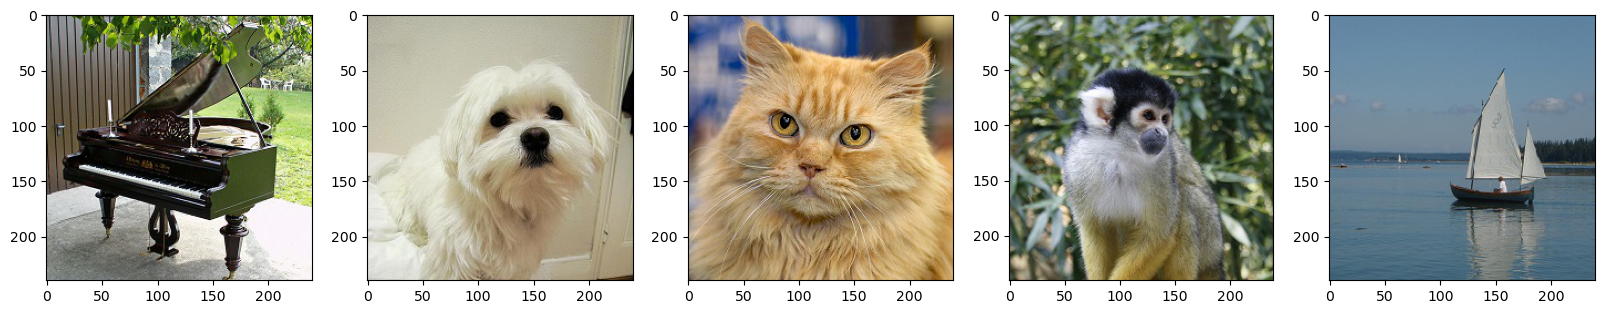

In [7]:
# 원본 이미지가 들어갈 리스트 만들기
images_originals = []

# 원본 이미지가 저장된 폴더에서 하나씩 img 불러서 리스트에 담기
for img in glob.glob('./data/img/*_0.jpg') :
    images_originals.append(mpimg.imread(img))

# 이미지 크기    
plt.figure(figsize = (20, 20))

for i, image_o in enumerate(images_originals) :
    plt.subplot(5, 5, i+1)
    plt.imshow(image_o)

In [8]:
# 사전에 학습된 딥러닝 모델 불러오기

model = VGG16(weights = 'imagenet', include_top = True)

553467096/553467096 [==============================] - 5s 0us/step


In [9]:
# 원본 이미지 이름과 imagenet에서 해당 이미지 인덱스

input_list = ['maltese', 'persian_cat', 'squirrel_monkey', 'grand_piano', 'yawl']
imagenet_index = ['153', '283', '382', '579', '914']

[[[183 114 176]
  [184 115 177]
  [184 115 177]
  ...
  [186 121 180]
  [186 121 180]
  [186 121 180]]

 [[184 115 177]
  [184 115 177]
  [184 115 177]
  ...
  [186 121 180]
  [186 121 180]
  [186 121 180]]

 [[184 115 177]
  [184 115 177]
  [183 114 176]
  ...
  [186 121 180]
  [186 121 180]
  [186 121 180]]

 ...

 [[206 161 225]
  [204 160 223]
  [205 159 223]
  ...
  [205 147 214]
  [202 147 213]
  [202 147 213]]

 [[202 158 221]
  [202 158 221]
  [205 159 223]
  ...
  [198 142 209]
  [198 142 209]
  [198 142 209]]

 [[196 152 215]
  [197 153 216]
  [199 154 218]
  ...
  [197 142 208]
  [197 142 208]
  [197 142 208]]]


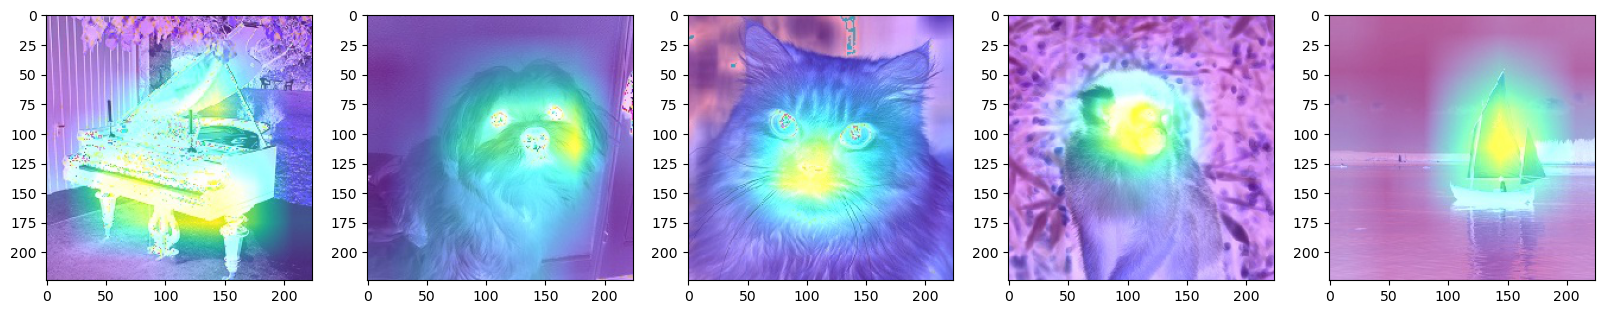

In [28]:
# gradient CAM 선택

explainer = GradCAM()

images_cams = []

for l, i in zip(input_list,imagenet_index) :
    img = load_img('./data/img/{}_0.jpg'.format(l), 
                   target_size = (224,224))
    # 이미지를 불러와서 내부에서 처리될 이미지 크기 설정
    img = img_to_array(img)
    # 이미지를 넘파이 배열로 변환
    data = ([img], None)
    grid = explainer.explain(data, model, int(i))
    # explainer.explain(데이터, 모델, 클래스)
    explainer.save(grid, '.', './data/img/{}_cam.jpg'.format(l))
    # 실행후 저장되는 이름
    # save(output, 저장될 폴더, 저장될 이름)
    
    # gradient CAM 알고리즘 적용된 이미지 불러오는 부분
    
plt.figure(figsize = (20, 20))
    
for img in glob.glob('./data/img/*_cam.jpg') :
    images_cams.append(mpimg.imread(img))
    
for i, image_c in enumerate(images_cams) :
    plt.subplot(5, 5, i+1)
    plt.imshow(image_c)

print(grid)        

In [36]:
# 오클루젼
explainer = OcclusionSensitivity()

# 알고리즘 적용된 이미지가 들어갈 빈 리스트 생성

images_occls = []

# 패치크기 설정이 추가됨(patch_size 정함)
# patch_size : 사진을 가리며 움직이는 검은색 사각형의 크기(일종의 mask)
# patch_size 크게 잡으면 >> 조금 더 넓은 범위의 결과가 나옴
# patch_size 작게 잡으면 >> 조금 더 세밀한 부분을 가리키는 결과가 나옴

In [37]:
patch_size = 40

In [38]:
# 오클루젼 알고리즘 실행

for l, i in zip(input_list,imagenet_index) :
    img = load_img('./data/img/{}_0.jpg'.format(l), 
                   target_size = (224,224))
    # 이미지를 불러와서 내부에서 처리될 이미지 크기 설정
    img = img_to_array(img)
    # 이미지를 넘파이 배열로 변환
    data = ([img], None)
    occls = explainer.explain(data, model, int(i), patch_size)
    # explainer.explain(데이터, 모델, 클래스)
    explainer.save(occls, '.', './data/img/{}_occls.jpg'.format(l))

2/2 [==============================] - 0s 61ms/step


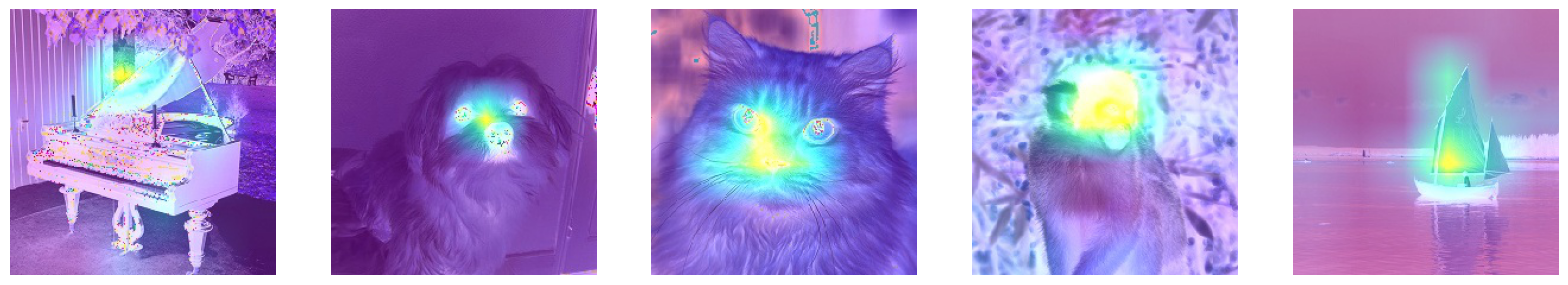

In [39]:
# 오클루전 알고리즘이 적용된 이미지 불러오기

plt.figure(figsize = (20, 20))

for img in glob.glob('./data/img/*_occls.jpg') :
    images_occls.append(mpimg.imread(img))
    
for i, image in enumerate(images_occls) :
    plt.subplot(5, 5, i+1)
    plt.imshow(image)
    plt.axis('off')

5/5 [==============================] - 0s 62ms/step


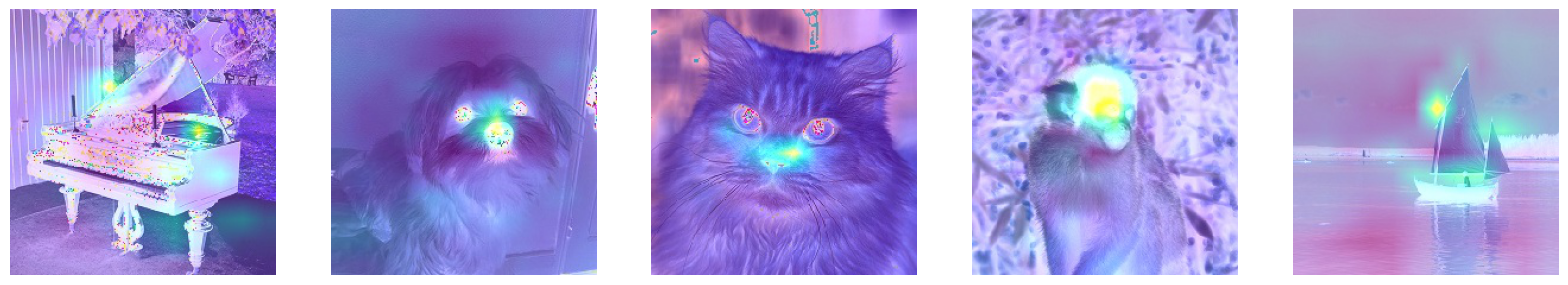

In [45]:
explainer = OcclusionSensitivity()
images_occls = []
patch_size = 20

# 오클루젼 알고리즘 실행

for l, i in zip(input_list,imagenet_index) :
    img = load_img('./data/img/{}_0.jpg'.format(l), 
                   target_size = (224,224))
    # 이미지를 불러와서 내부에서 처리될 이미지 크기 설정
    img = img_to_array(img)
    # 이미지를 넘파이 배열로 변환
    data = ([img], None)
    occls = explainer.explain(data, model, int(i), patch_size)
    # explainer.explain(데이터, 모델, 클래스)
    explainer.save(occls, '.', './data/img/{}_occls20.jpg'.format(l))
    
# 오클루전 알고리즘이 적용된 이미지 불러오기

plt.figure(figsize = (20, 20))

for img in glob.glob('./data/img/*_occls20.jpg') :
    images_occls.append(mpimg.imread(img))
    
for i, image in enumerate(images_occls) :
    plt.subplot(5, 5, i+1)
    plt.imshow(image)
    plt.axis('off')
